# Deep Learning With Python

## MNIST handwritten recognition

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images, trai_labels = conjunto de treinamento da rede neural.
# test_images, test_labels = conjunto de testes.

A imagens são decodificadas em arrays Numpy, e as legendas como array de digitos, de 0 à 9. As imagens e legendas tem uma correspondência um-a-um

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### The network architecture

In [7]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

### The compilation step

In [8]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Antes do treinamento da rede, vamos pré-processar os dados remodulando para a forma que a rede neural espera e escalar de forma que todos os valores estejam no intervalo [0, 1].

### Preparados os dados de imagens

Basicamente, queremos transforma o array 2D que corresponde as imagens de treinamento para arrays 1D, para serem inseridos na rede neural a ser treinada

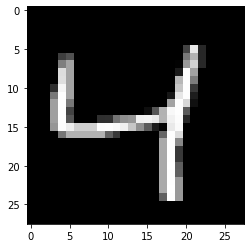

In [9]:
import matplotlib.pyplot as plt
plt.imshow(train_images[2,:,:], cmap='gray')

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 ## colocando os valores do array dentro do intervalo [0, 1]

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Preparing the labels

In [11]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
test_labels.shape[0]

10000

Estamos prontos para treinar a rede neural, no qual Keras é feito via uma chall para o método fit da rede neural. nos 'fitamos' o modelo ao dados de treinamento:

In [12]:
network.fit(train_images, train_labels,epochs=5, batch_size=128)

2021-10-03 21:11:13.144135: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-03 21:11:13.166282: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz


Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4306 - accuracy: 0.8725
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1078 - accuracy: 0.9675
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0671 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0485 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0357 - accuracy: 0.9891


Duas quantidades são mostradas durante o treinamento: a perda da rede neural durante o treinamento, e a precisão da rede ao longo do treinamento.

In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 872us/step - loss: 0.0733 - accuracy: 0.9769
test_acc: 0.9768999814987183
